# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Below will only work if the repo is public.
#simple_imputed_df = pd.read_csv('https://raw.githubusercontent.com/DATS6103-Team5/FinalProject/main/data/simple_imputed_df.csv')
simple_imputed_df = pd.read_csv("simple_imputed_df.csv")
simple_imputed_df.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,City,State,review_scores_rating,reviews_per_month,bathrooms
0,1489424,5294164,1.0,100.0,87.0,0,1,FOURTEENTH WARD,42.66719,-73.81580,...,248,50,6,0,1,albany,ny,4.75,1.94,1.0
1,2992450,4621559,3.0,100.0,100.0,0,0,THIRD WARD,42.65789,-73.75370,...,9,0,0,0,1,albany,ny,3.56,0.08,1.0
2,3820211,19648678,1.0,100.0,66.0,0,1,SIXTH WARD,42.65222,-73.76724,...,292,8,1,0,4,albany,ny,4.74,2.51,1.0
3,5651579,29288920,1.0,100.0,99.0,0,1,SECOND WARD,42.64615,-73.75966,...,337,31,4,0,2,albany,ny,4.51,3.13,1.0
4,6623339,19648678,1.0,100.0,66.0,0,1,SIXTH WARD,42.65222,-73.76724,...,306,5,0,0,4,albany,ny,4.73,2.87,1.0


## Questions 8-15



8.   Do superhosts tend to have higher review scores, more bookings compared to regular hosts?
9.   How does managing multiple listings affect the review scores.
10. Does host_response_rate, host_response_time, and host_acceptance_rate have an impact on the price and reviews?
11. How does the availability of instant bookability affect the price and customer satisfaction?
12. Compare states in terms of price, rating, and number of listings.
13. Neighbourhoods with highest no of listings in each City.
14. Costliest neighbourhood in each city.
15. Neighbourhoods with more than 1000 listings (Popular Neighbourhoods)

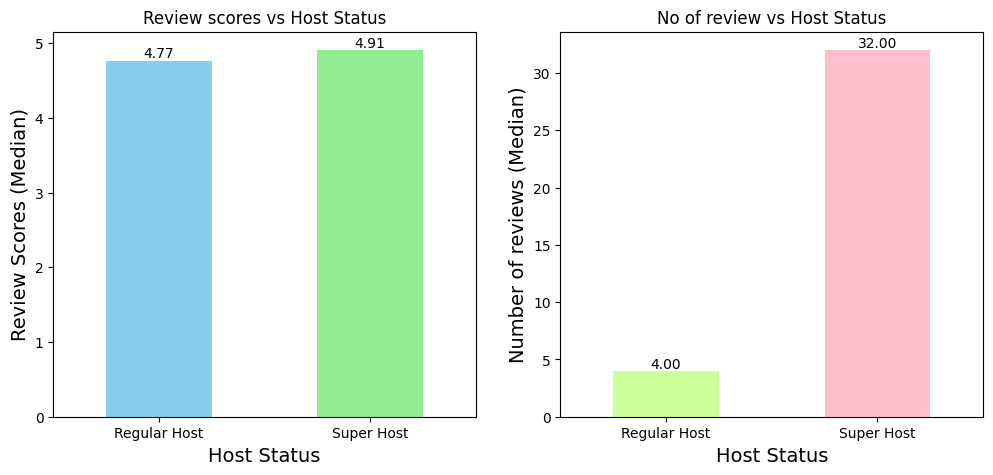

In [5]:
"""
Q8. Do superhosts tend to have higher review scores, more bookings compared to regular hosts?
"""

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Review scores vs host status
means = simple_imputed_df.groupby(["host_is_superhost"])["review_scores_rating"].median()
means.plot(kind = "bar", color = ['skyblue', 'lightgreen'], ax = ax[0])


# Title and labels
ax[0].set_title('Review scores vs Host Status')
ax[0].set_xlabel('Host Status', fontsize=14)
ax[0].set_ylabel('Review Scores (Median)', fontsize=14)
ax[0].set_xticks(ticks=[0, 1], labels=['Regular Host', 'Super Host'], rotation = 0);

for p in ax[0].patches:
    ax[0].annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


# Number of reviews vs different types of hosts
means = simple_imputed_df.groupby(["host_is_superhost"])["number_of_reviews"].median()
means.plot(kind = "bar", color = ['#ccff99', 'pink'], ax = ax[1])


# Title and labels
ax[1].set_title('No of review vs Host Status')
ax[1].set_xlabel('Host Status', fontsize=14)
ax[1].set_ylabel('Number of reviews (Median)', fontsize=14)
ax[1].set_xticks(ticks=[0, 1], labels=['Regular Host', 'Super Host'], rotation = 0);

for p in ax[1].patches:
    ax[1].annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

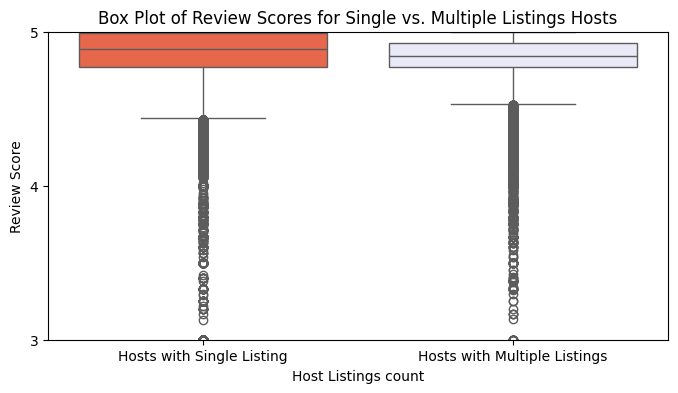

In [6]:
"""
9. How does managing multiple listings affect the review scores
"""

single_df = simple_imputed_df.query("calculated_host_listings_count == 1").reset_index()["review_scores_rating"]
group_df = simple_imputed_df.query("calculated_host_listings_count > 1").groupby('host_id')['review_scores_rating'].median().reset_index()["review_scores_rating"]

df = pd.DataFrame({"scores": single_df.tolist() + group_df.tolist(),
              "type": ["single"]*single_df.shape[0]+ ["multi"]*group_df.shape[0]})

plt.figure(figsize=(8, 4))
plt.ylim(3, 5)
sns.boxplot(x='type', y='scores', data=df, palette = ["#FF5733", "#E6E6FA"])
plt.xlabel('Host Listings count')
plt.ylabel('Review Score')
plt.title('Box Plot of Review Scores for Single vs. Multiple Listings Hosts')
plt.xticks(ticks=[0, 1], labels=['Hosts with Single Listing', 'Hosts with Multiple Listings'])
plt.yticks([3, 4, 5])
plt.show()

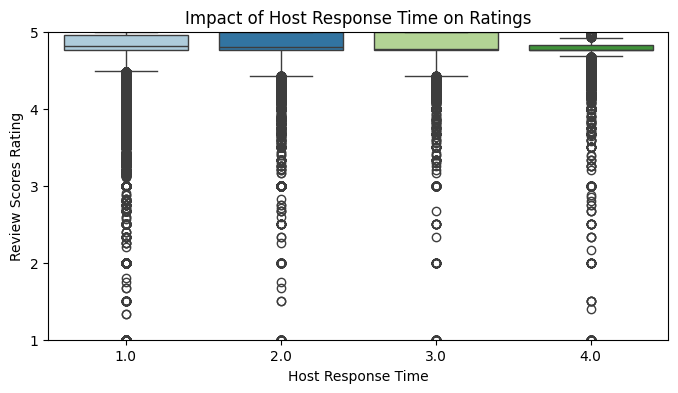

In [7]:
"""
10. Does host_response_time has an impact on the Review Scores?
"""

plt.figure(figsize=(8, 4))
plt.ylim(1, 5)
sns.boxplot(x='host_response_time', y='review_scores_rating', data=simple_imputed_df, palette = "Paired")
plt.title('Impact of Host Response Time on Ratings')
plt.xlabel('Host Response Time')
plt.ylabel('Review Scores Rating')
plt.yticks(range(1, 6))
plt.show()

In [8]:
"""
11. How does the availability of instant bookability affect the price and customer satisfaction?
"""


# Split data into instant bookable and non-instant bookable listings
instant_bookable = simple_imputed_df[simple_imputed_df['instant_bookable'] == 1]
non_instant_bookable = simple_imputed_df[simple_imputed_df['instant_bookable'] == 0]

# Compare the mean number of reviews (occupancy rate)
print("Mean number of reviews for instant bookable listings:", instant_bookable['number_of_reviews'].median())
print("Mean number of reviews for non-instant bookable listings:", non_instant_bookable['number_of_reviews'].median())

# Perform a t-test to check if the difference in means is significant
t_stat, p_val = ttest_ind(instant_bookable['number_of_reviews'], non_instant_bookable['number_of_reviews'])
print(f"\nDoes the no of reviews vary with values of instant_bookable variable?\n t-statistic: {t_stat}, p-value: {p_val}")



# Compare the mean price and perform the t-test to check for significance.
print("\nMean price for instant bookable listings:", instant_bookable['price'].median())
print("Mean price for non-instant bookable listings:", non_instant_bookable['price'].median())

t_stat, p_val = ttest_ind(instant_bookable['price'], non_instant_bookable['price'])
print(f"\nDoes the price vary with the values of instant_bookable variable?\n t-statistic: {t_stat}, p-value: {p_val}")

Mean number of reviews for instant bookable listings: 10.0
Mean number of reviews for non-instant bookable listings: 11.0

Does the no of reviews vary with values of instant_bookable variable?
 t-statistic: -10.007527511962332, p-value: 1.426681998099745e-23

Mean price for instant bookable listings: 168.0
Mean price for non-instant bookable listings: 143.0

Does the price vary with the values of instant_bookable variable?
 t-statistic: 48.3987018974754, p-value: 0.0


In [9]:
# https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.

abbreviation_to_name = {
    "AK": "Alaska", "AL": "Alabama", "AR": "Arkansas", "AZ": "Arizona", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "IA": "Iowa", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "MA": "Massachusetts", "MD": "Maryland",
    "ME": "Maine", "MI": "Michigan", "MN": "Minnesota", "MO": "Missouri", "MS": "Mississippi",
    "MT": "Montana", "NC": "North Carolina", "ND": "North Dakota", "NE": "Nebraska", "NH": "New Hampshire",
    "NJ": "New Jersey", "NM": "New Mexico", "NV": "Nevada", "NY": "New York", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VA": "Virginia",
    "VT": "Vermont", "WA": "Washington", "WI": "Wisconsin", "WV": "West Virginia", "WY": "Wyoming",
    "DC": "District of Columbia", "AS": "American Samoa", "GU": "Guam GU", "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico PR", "VI": "U.S. Virgin Islands",
}

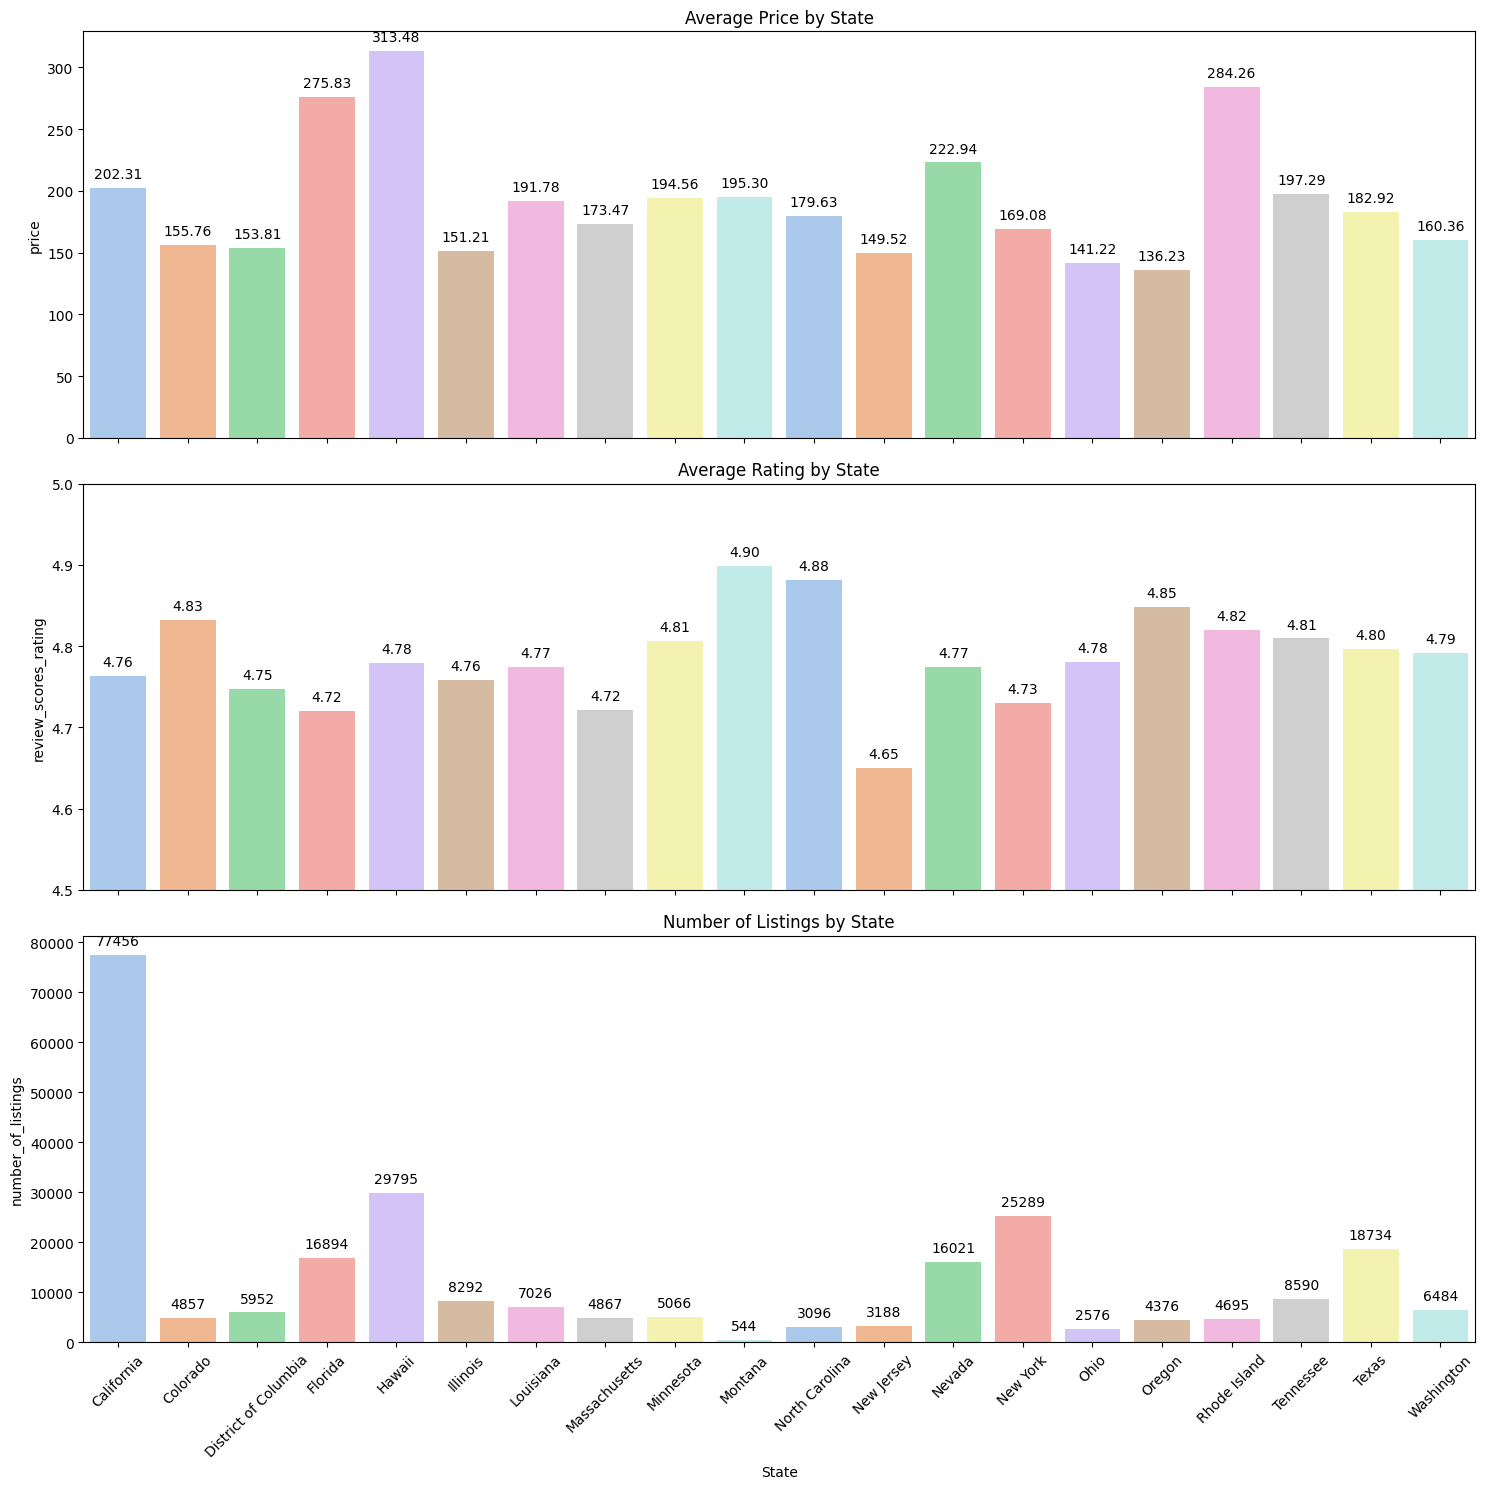

In [10]:
"""
12. Compare states in terms of price, rating, and number of listings.
"""


# Group data by 'State' and calculate average price, rating, total number of listing for each city
state_stats = simple_imputed_df.groupby('State').agg({
    'price': 'mean',
    'review_scores_rating': 'mean',
    'id': 'count'
}).rename(columns={'id': 'number_of_listings'}).reset_index()

state_stats["State"] = state_stats["State"].apply(lambda x: x.upper()).map(abbreviation_to_name)

fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Price
sns.barplot(x='State', y='price', data=state_stats, ax=axes[0], palette  = sns.color_palette("pastel"))
axes[0].set_title('Average Price by State')


for i, bar in enumerate(axes[0].containers):
    neighborhood = f"{state_stats.iloc[i]['price']:.2f}"
    axes[0].bar_label(bar, labels=[neighborhood], rotation=0, fontsize=10, padding=5)

# Review Scores Rating
sns.barplot(x='State', y='review_scores_rating', data=state_stats, ax=axes[1], palette = sns.color_palette("pastel"))
axes[1].set_ylim(4.5, 5)
axes[1].set_title('Average Rating by State')

for i, bar in enumerate(axes[1].containers):
    neighborhood = f"{state_stats.iloc[i]['review_scores_rating']:.2f}"
    axes[1].bar_label(bar, labels=[neighborhood], rotation=0, fontsize=10, padding=5)

# Number of listings
sns.barplot(x='State', y='number_of_listings', data=state_stats, ax=axes[2], palette = sns.color_palette("pastel"))
axes[2].set_title('Number of Listings by State')

for i, bar in enumerate(axes[2].containers):
    neighborhood = state_stats.iloc[i]['number_of_listings']
    axes[2].bar_label(bar, labels=[neighborhood], rotation=0, fontsize=10, padding=5)

axes[2].set_xticklabels(labels = state_stats["State"], rotation = 45)

plt.tight_layout()
plt.show()

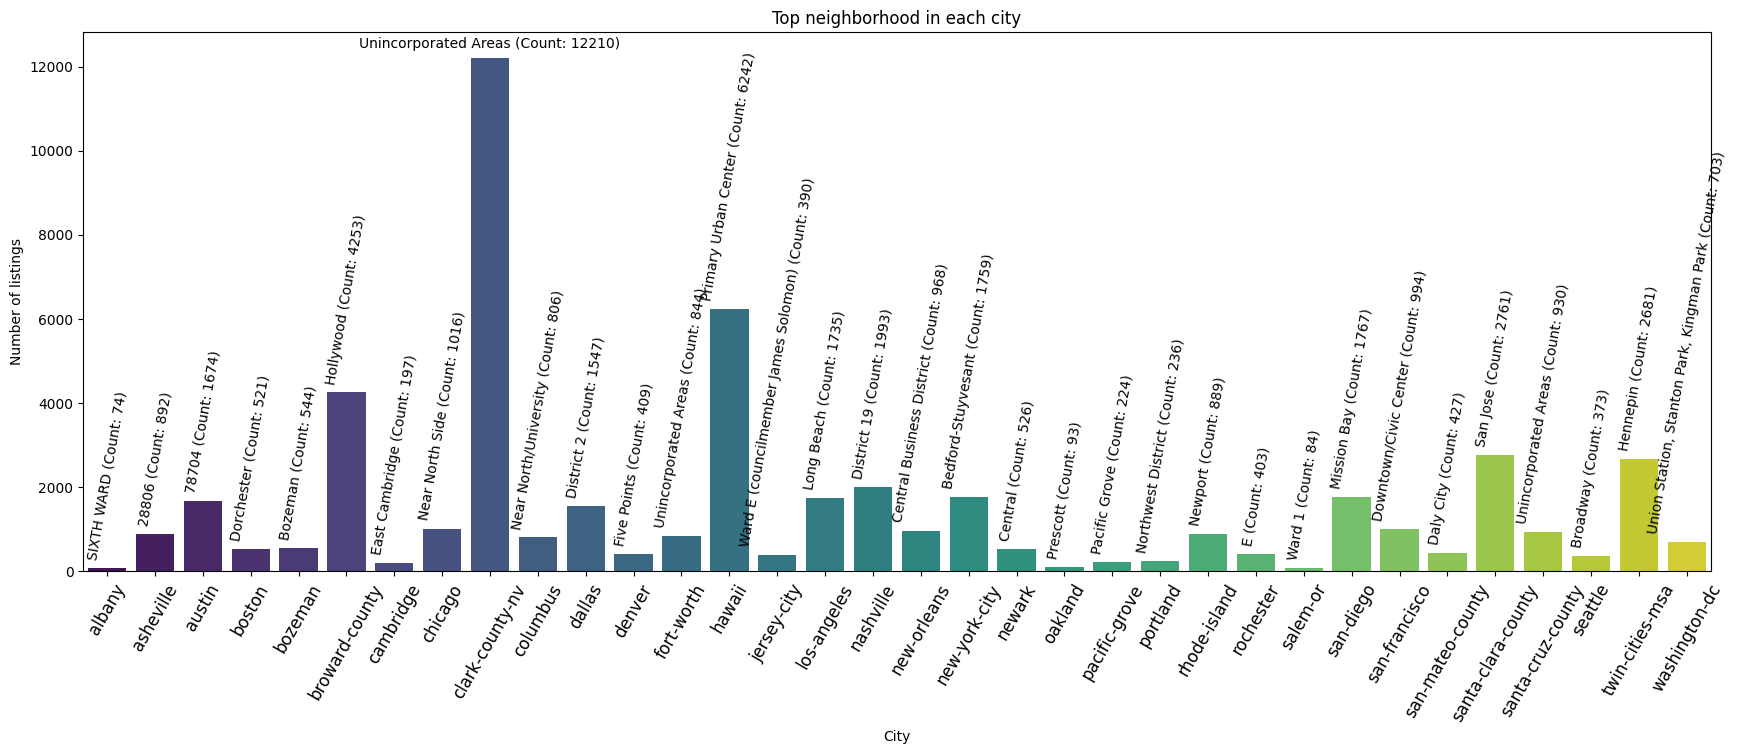

In [11]:
"""
13. Neighbourhoods with highest no of listings in each City.
"""

city_neighborhood_counts = simple_imputed_df.groupby(['City', 'neighbourhood_cleansed']).size().reset_index(name='count')
top_neighborhoods = city_neighborhood_counts.sort_values(['City', 'count'], ascending=[True, False]).groupby('City').head(1)

plt.figure(figsize=(21, 7))
bar_ax = sns.barplot(x="City", y="count", data=top_neighborhoods, palette="viridis")

# Add neighborhood names and their count.
for i, bar in enumerate(bar_ax.containers):
    neighborhood = str(top_neighborhoods.iloc[i]['neighbourhood_cleansed']) + f" (Count: {top_neighborhoods.iloc[i]['count']})"
    if top_neighborhoods.iloc[i]["count"] > 10000:
      rotation = 0
    else:
      rotation = 80
    bar_ax.bar_label(bar, labels=[neighborhood], rotation=rotation, fontsize=10, padding=5)


plt.xlabel("City")
plt.ylabel("Number of listings")
plt.xticks(ticks=top_neighborhoods["City"], fontsize=12, rotation=60)
plt.title("Top neighborhood in each city")
plt.show()

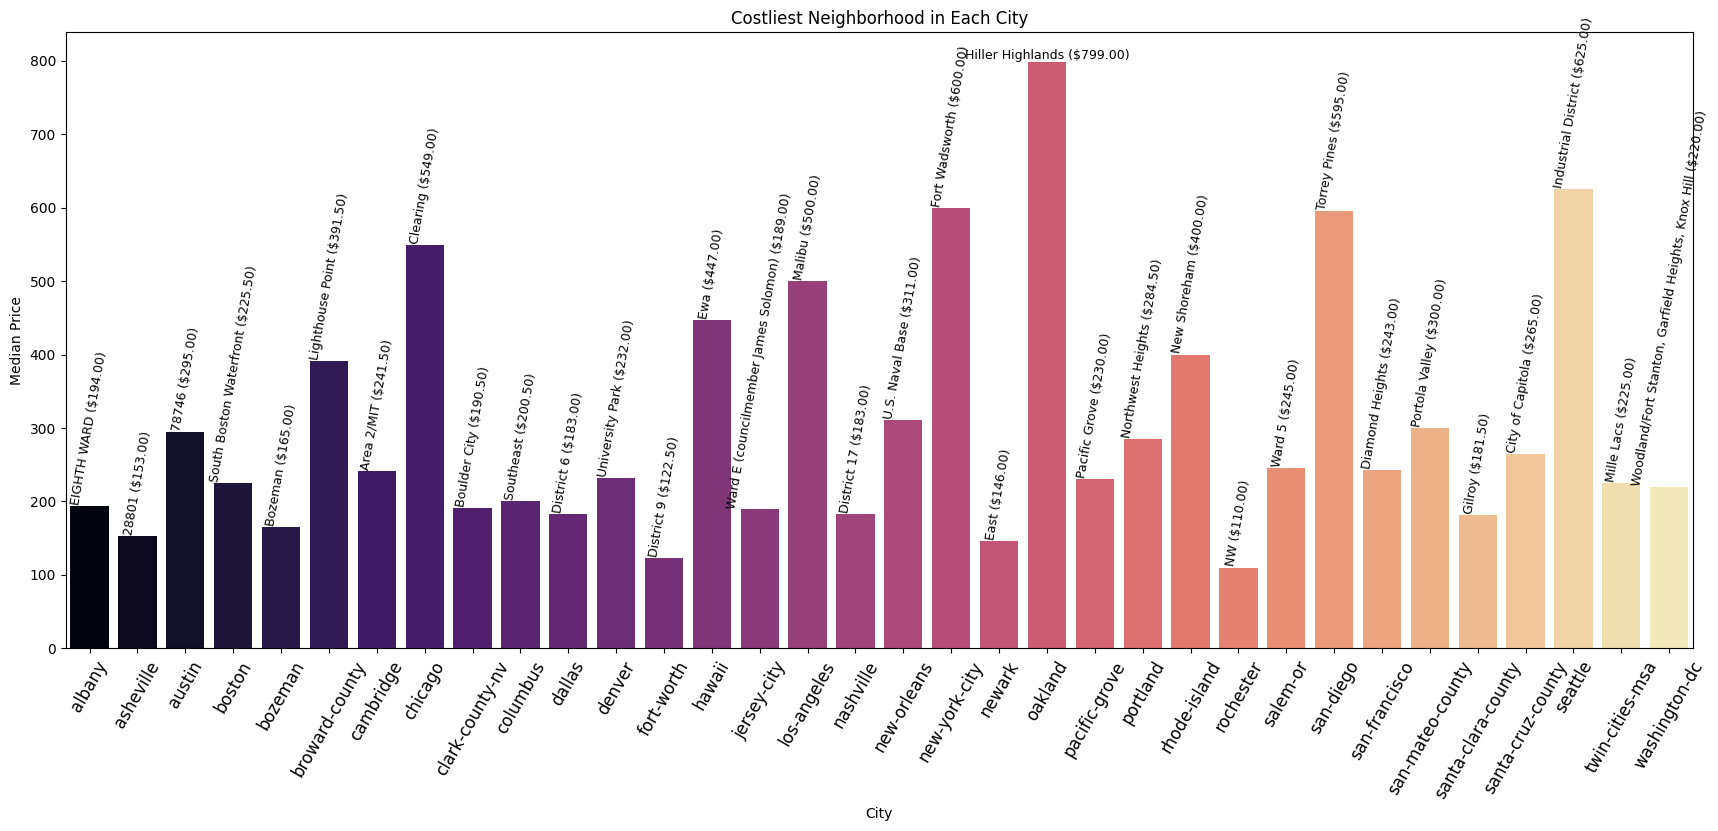

In [12]:
"""
14. Costliest neighbourhood in each city.
"""

# Calculate the average price for each city and neighborhood combination
avg_prices = simple_imputed_df.groupby(['City', 'neighbourhood_cleansed'])['price'].median().reset_index()

# Merge the average prices with the top neighborhood counts
top_neighborhoods = city_neighborhood_counts.merge(avg_prices, on=['City', 'neighbourhood_cleansed'])

# Sort by city and average price (descending)
top_neighborhoods = top_neighborhoods.sort_values(['City', 'price'], ascending=[True, False]).groupby('City').head(1)

plt.figure(figsize=(21, 8))
bar_ax = sns.barplot(x="City", y="price", data=top_neighborhoods, palette="magma")

# Add neighborhood names and the median price
for i, bar in enumerate(bar_ax.containers):

    if top_neighborhoods.iloc[i]["price"] > 750:
      rotation = 0
    else:
      rotation = 80

    neighborhood = str(top_neighborhoods.iloc[i]['neighbourhood_cleansed']) + f" (${top_neighborhoods.iloc[i]['price']:.2f})"
    bar_ax.bar_label(bar, labels=[neighborhood], rotation=rotation, fontsize=9)


plt.xlabel("City")
plt.ylabel("Median Price")
plt.xticks(ticks=top_neighborhoods["City"], fontsize=12, rotation=60)
plt.title("Costliest Neighborhood in Each City")
plt.show()

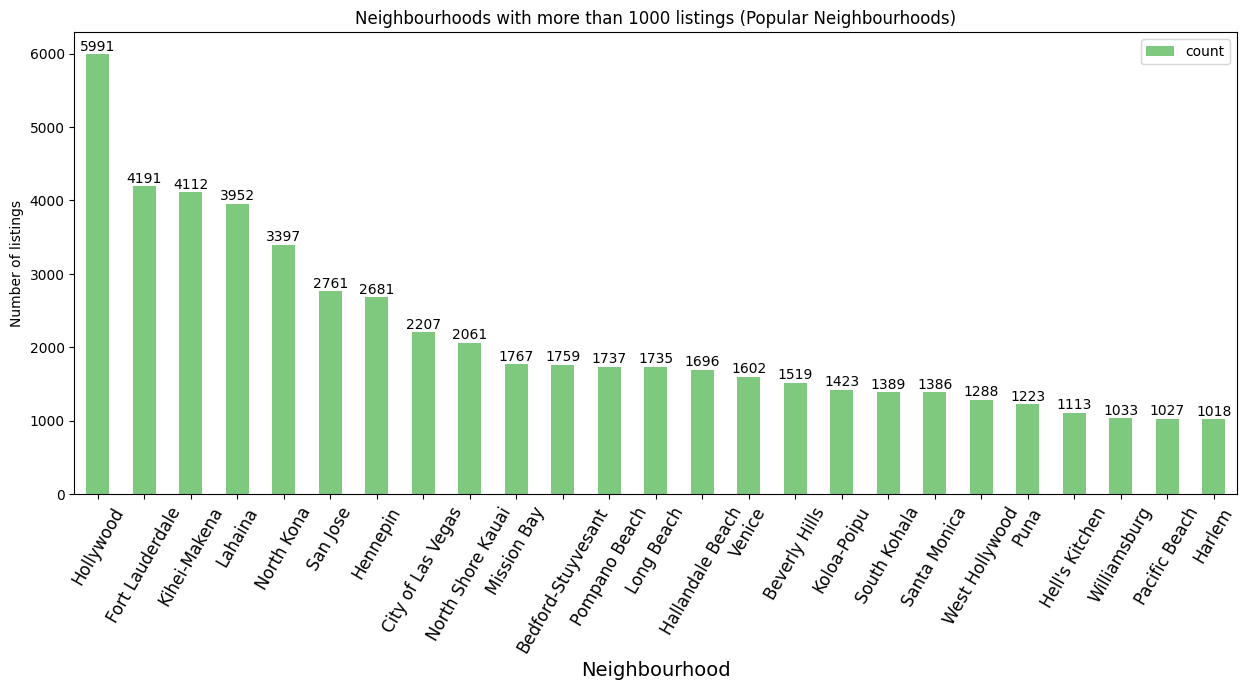

In [13]:
"""
15. Neighbourhoods with more than 1000 listings (Popular Neighbourhoods)
"""

# Get the count of each neighborhood
neighborhood_counts = simple_imputed_df["neighbourhood_cleansed"].value_counts()

# Filter out neighborhoods with less than 1000 listings
common_neighborhoods = neighborhood_counts[neighborhood_counts > 1000].drop(['78702', '78704'])

common_neighborhoods = common_neighborhoods[common_neighborhoods.index.str.contains('Areas|Center|District|town|Side|Village') == False].to_frame().reset_index()

bar_ax = common_neighborhoods.plot(kind = "bar", colormap="Accent", figsize = (15, 6))
plt.title("Neighbourhoods with more than 1000 listings (Popular Neighbourhoods)")
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Number of listings")
plt.xticks(ticks = range(common_neighborhoods.shape[0]), labels=common_neighborhoods["neighbourhood_cleansed"], fontsize=12, rotation=60)

for i in range(common_neighborhoods.shape[0]):
    plt.text(i, common_neighborhoods["count"][i] + 50, common_neighborhoods["count"][i], ha = 'center')


plt.show()

<Figure size 1500x600 with 0 Axes>

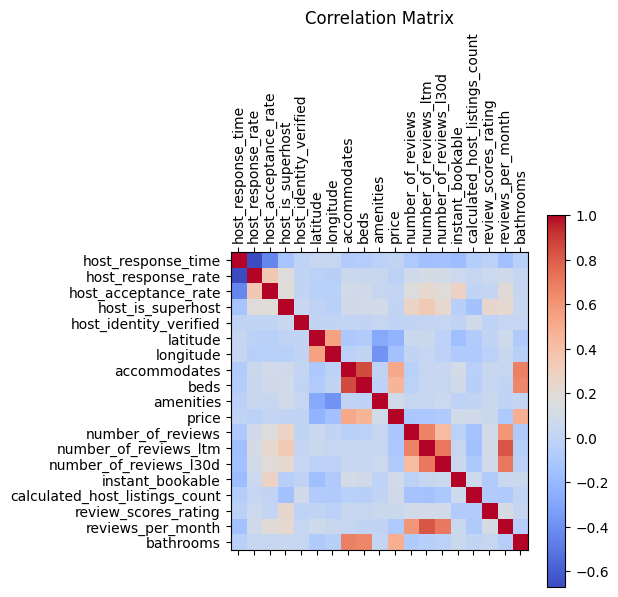

In [14]:
# Others

# Correlation plot

num_cols = simple_imputed_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = simple_imputed_df[num_cols].drop(["id", "host_id"], axis = 1).corr()

plt.figure(figsize = (15, 6))
plt.matshow(correlation_matrix, cmap="coolwarm")

# Add labels for rows and columns
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.colorbar()

plt.title("Correlation Matrix")
plt.show();

In [15]:
# Proportions of calculated_host_listings between Regular hosts and Super hosts

count_single = simple_imputed_df.query("calculated_host_listings_count == 1")
count_multi = simple_imputed_df.query("calculated_host_listings_count > 1")

print("Hosts with single listings:")
print(count_single["host_is_superhost"].value_counts() / len(count_single))
print("\nHosts with multiple listings:")
print(count_multi["host_is_superhost"].value_counts() / len(count_multi))

Hosts with single listings:
host_is_superhost
0    0.605832
1    0.394168
Name: count, dtype: float64

Hosts with multiple listings:
host_is_superhost
0    0.572639
1    0.427361
Name: count, dtype: float64
